In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm_notebook

import warnings
sys.path.append('..')
warnings.simplefilter('ignore')
sns.set(style="darkgrid")
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})


In [2]:
from generator import GraphGenerator

In [99]:
dname = ['M=4*N', 'M=12*N', 'M=25*N', 
         'M=N*N/50', 'M=N*N/10']
N = range(100, 5001, 500)

benchmarks = []
for n in tqdm_notebook(N, total=len(N)):
    density = [4, 12, 25, n/50, n / 10]
    for i, d in tqdm_notebook(enumerate(density),  disable=True):
        m = max(n+1, n * d)
        gen = GraphGenerator(max_nodes=n, max_edges=m)
        G = gen.generate_weighted_graph(w_range=(0, 1000), verbose=False)
        bench = f'../benchmarks/test{i}_m{n}_m{m}_.txt'
        gen.save_to_file(G, bench)
        benchmarks.append(' '.join(map(str, [bench, n, m, dname[i]])))

In [100]:
with open('../benchmarks/benchmarks.txt', 'w') as f:
    f.writelines("%s\n" % l for l in benchmarks)

In [90]:
#run './build-win-release/Debug/shortest-path-by-heaps.exe'

In [112]:
# time in microseconds
results = pd.read_csv('../results/performance.csv')
print(len(results))
results.head()

150


,benchmark,number_of_nodes,number_of_edges,density,Dijkstras,Dijkstras_DHeap,Dijkstras_BinomialHeap
0,../benchmarks/test0_m100_m400_.txt,100,400.0,M=4*N,121.0,44.0,640.0
1,../benchmarks/test0_m100_m400_.txt,100,400.0,M=4*N,102.0,44.0,488.0
2,../benchmarks/test0_m100_m400_.txt,100,400.0,M=4*N,102.0,42.0,501.0
3,../benchmarks/test1_m100_m1200_.txt,100,1200.0,M=12*N,203.0,384.0,751.0
4,../benchmarks/test1_m100_m1200_.txt,100,1200.0,M=12*N,212.0,475.0,762.0


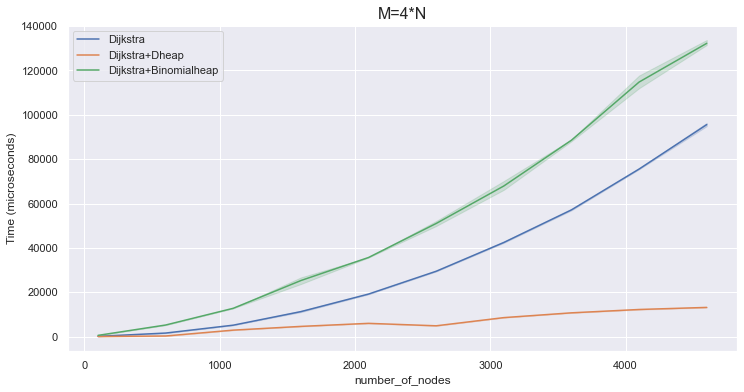

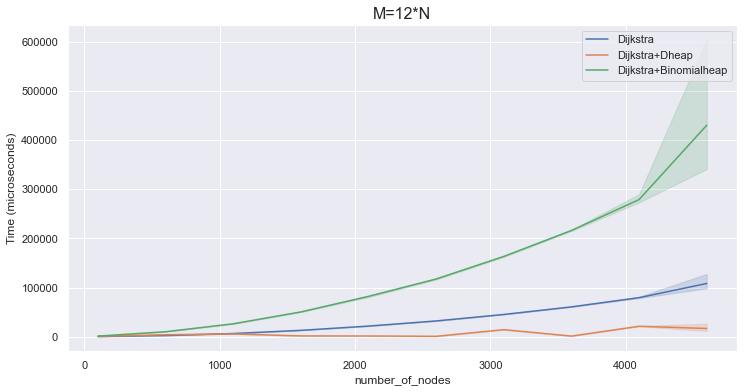

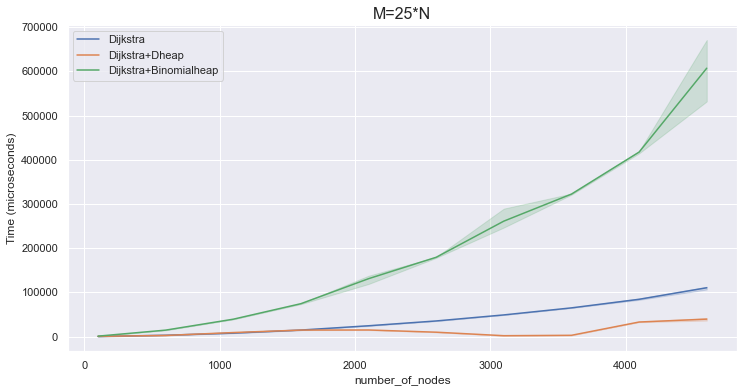

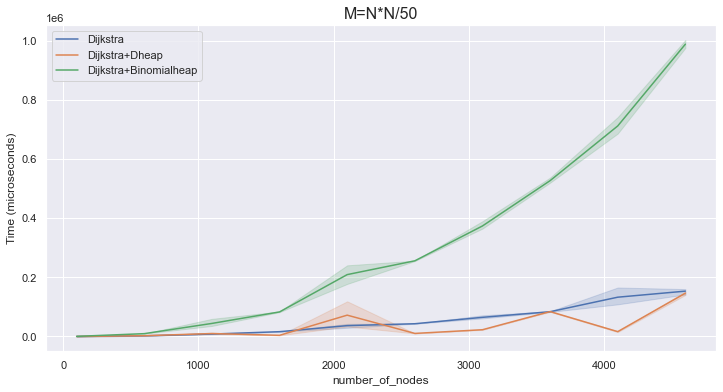

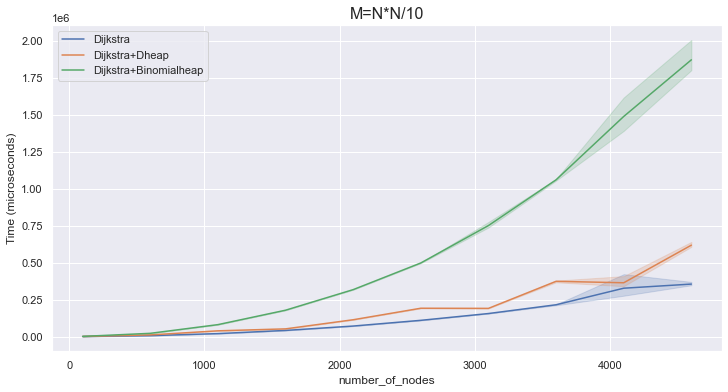

In [113]:
for density in results.density.unique():
    tmp = results[results.density == density]
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=tmp, x="number_of_nodes", y="Dijkstras", label='Dijkstra')
    sns.lineplot(data=tmp, x="number_of_nodes", y="Dijkstras_DHeap", label='Dijkstra+Dheap')
    sns.lineplot(data=tmp, x="number_of_nodes", y="Dijkstras_BinomialHeap", label='Dijkstra+Binomialheap')
    plt.title(density, fontsize=16)
    plt.ylabel('Time (microseconds)')
    d = density.replace('*','').replace('/','by')
    plt.savefig(f'img/{d}.png')
    plt.show()